Kaggle dataset from: https://www.kaggle.com/fedesoriano/heart-failure-prediction


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Info about the data


1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]






# Load data

In [6]:
df = pd.read_csv('heart.csv')     # Load the dataset

# Explore data

In [4]:
df.head(5) # See the 5 first lines

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
type(df) # class

pandas.core.frame.DataFrame

In [13]:
print(df.shape) # Dimension
print("Number of columns: " + str(df.shape[1])) # nº Columns
print("Number of rows: " + str(df.shape[0])) # nº rows

(918, 12)
Number of columns: 12
Number of rows: 918


In [18]:
## Count distinct values
# Count distinct values in a specific column
print("Number of distinct values in the column HeartDisease: " + str(df["HeartDisease"].nunique()))
# Count distinct values in all columns
df.nunique()


Number of distinct values in the column HeartDisease: 2


Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [23]:
## Number of Na values
# Count Na in a specific column
print("Number of NA values in the column HeartDisease: " + str(df["HeartDisease"].isna().sum())) 
# Count NA in all columns
df.isna().sum()

Number of NA values in the column HeartDisease: 0


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [35]:
## Categorical and numeric columns
cols = df.columns # Column names
num_cols = df._get_numeric_data().columns # Columns with numeric data
print("Number of numeric columns: " + str(len(num_cols))) # Number of columns with numeric data
print("Number of categorical columns: " + str(len(cols)-len(num_cols))) # Number of columns with categorical data

Number of numeric columns: 7
Number of categorical columns: 5


In [44]:
# Select numeric columns
df_num= df[num_cols]
print("Mean of numeric columns: " + str(df_num.mean())) # Mean of numeric columns
print("Variance of numeric columns: " + str(df_num.var()))

Mean of numeric columns: Age              53.510893
RestingBP       132.396514
Cholesterol     198.799564
FastingBS         0.233115
MaxHR           136.809368
Oldpeak           0.887364
HeartDisease      0.553377
dtype: float64
Variance of numeric columns: Age                88.974254
RestingBP         342.773903
Cholesterol     11964.891079
FastingBS           0.178968
MaxHR             648.228614
Oldpeak             1.137572
HeartDisease        0.247420
dtype: float64


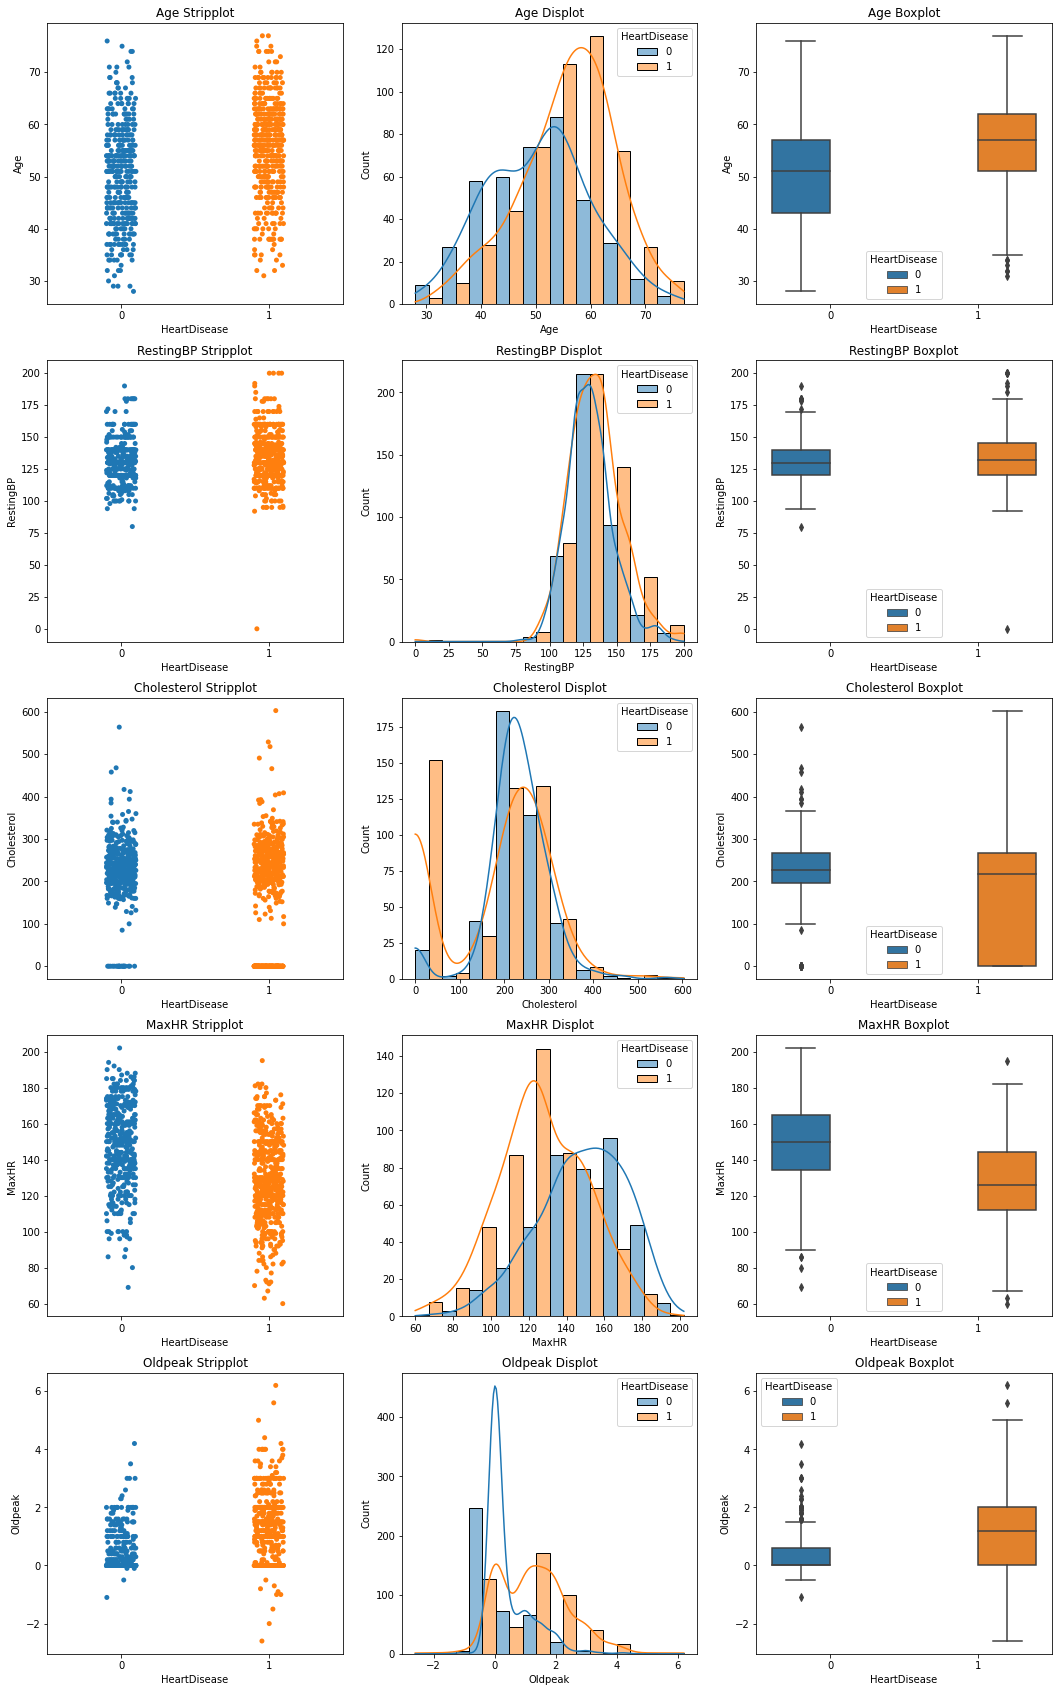

In [85]:
# Plot each categorical variable vs HeartDisease
fig, axes = plt.subplots(5, 3, figsize = (18, 30))

num_feats = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
#for k, col in zip(range(len(num_feats)), num_feats):
for k, col in enumerate(num_feats):
    sns.stripplot(ax = axes[k][0], x = 'HeartDisease', y = col, data = df, jitter = True)
    axes[k][0].set_title(f'{col} Stripplot')

    sns.histplot(ax = axes[k][1], x = col, data = df, kde = True, bins = 10, hue = 'HeartDisease', multiple = 'dodge')
    axes[k][1].set_title(f'{col} Displot')

    sns.boxplot(ax = axes[k][2], x = 'HeartDisease', y = col, data = df, hue = 'HeartDisease')
    axes[k][2].set_title(f'{col} Boxplot')


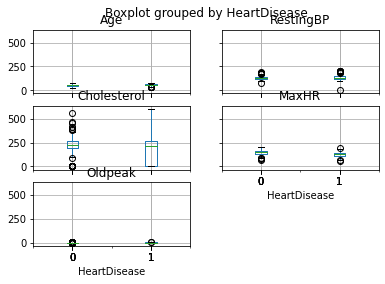

In [86]:
boxplot = df.boxplot(column=num_feats, by="HeartDisease")